라이브러리 Import 하기

In [1]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import numpy as np
import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


X and Y data (given)

In [2]:
x_train = [1, 2, 3, 4, 5]
#y_train = [2, 4, 6, 8, 10]
y_train = [3, 5, 7, 9, 11] #y = 2x +1

signal_length = len(x_train)
y_noise = np.random.normal(0, 1, signal_length)

y_train = y_train + y_noise
# 다음의 것들도 해보시오
#y_train = [2, 4, 6] # 그냥 x_train 에 2배 곱해서 생성
#y_train = [3, 5, 7]

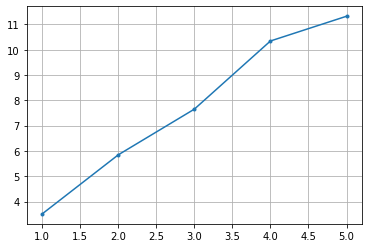

In [3]:
plt.plot(x_train, y_train,'.-')
plt.grid()

Initialization

In [4]:
useRandom = False

In [5]:
if useRandom:
    W = tf.Variable(tf.random_normal([1]), name='weight')
    b = tf.Variable(tf.random_normal([1]), name='bias')
else:
    w0 = 7.0;
    b0 = 5.0;

    W = tf.Variable(w0*tf.ones([1]), name='weight')
    b = tf.Variable(b0*tf.ones([1]), name='bias')

Our hypothesis$$ H(x)=Wx + b $$

In [6]:
hypothesis = x_train * W + b

cost/loss function 정의하기

loss of one training example :$$loss = \mathcal{L}(\hat{y}, y) = (\hat y^{(i)} - y^{(i)})^2 \tag{1}$$

In [7]:
loss = tf.reduce_mean(tf.square(hypothesis - y_train))

Optimizer

In [8]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(loss)

Launch the graph in a session

In [9]:
sess = tf.Session()

Initializes global variables in the graph.

In [10]:
sess.run(tf.global_variables_initializer())

In [11]:
nb_epoch = 1001
vloss = [] #empty list
vb = [] #empty list
vw = [] #empty list
for step in range(nb_epoch):
    sess.run(train)
    loss1 = sess.run(loss)
    vloss.append(loss1)
    
    if step % 50 == 0: # 5번마다
        w1 = sess.run(W)[0] # 기울기
        b1 = sess.run(b)[0] # bias
        
        print(step,'\t', loss1, '\t', w1, '\t',b1)

0 	 223.76181 	 5.7045903 	 4.634715
50 	 0.5297959 	 1.5964776 	 3.1994128
100 	 0.41260606 	 1.6610646 	 2.9662116
150 	 0.32908285 	 1.7155952 	 2.7693381
200 	 0.2695543 	 1.7616315 	 2.6031325
250 	 0.22712739 	 1.8004965 	 2.462818
300 	 0.19688879 	 1.8333074 	 2.3443599
350 	 0.17533703 	 1.8610075 	 2.244354
400 	 0.15997675 	 1.8843925 	 2.1599264
450 	 0.14902927 	 1.9041348 	 2.088651
500 	 0.1412269 	 1.9208014 	 2.028479
550 	 0.13566594 	 1.934872 	 1.9776797
600 	 0.13170257 	 1.9467508 	 1.9347935
650 	 0.12887774 	 1.9567791 	 1.8985882
700 	 0.12686443 	 1.9652455 	 1.8680222
750 	 0.12542959 	 1.9723928 	 1.8422178
800 	 0.124406815 	 1.9784268 	 1.8204331
850 	 0.12367801 	 1.9835209 	 1.802042
900 	 0.12315853 	 1.9878213 	 1.7865155
950 	 0.12278819 	 1.9914521 	 1.773408
1000 	 0.1225243 	 1.9945172 	 1.7623417


Text(0, 0.5, 'loss')

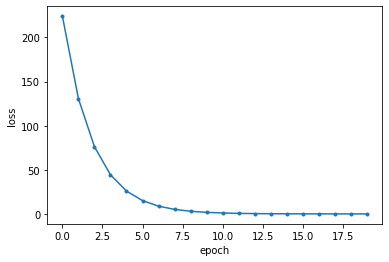

In [12]:
plt.plot(vloss[:20],'.-')
plt.xlabel('epoch')
plt.ylabel('loss')

학습완료

In [13]:
w1 = sess.run(W)[0] # 기울기
b1 = sess.run(b)[0] # bias

출력해보기

In [14]:
print(w1, b1)

1.9945172 1.7623417


In [15]:
str1 = 'y = ' + str(w1) +'x + ' + str(b1)
print(str1)

y = 1.9945172x + 1.7623417


Text(0.5, 1.0, 'y = 1.9945172x + 1.7623417')

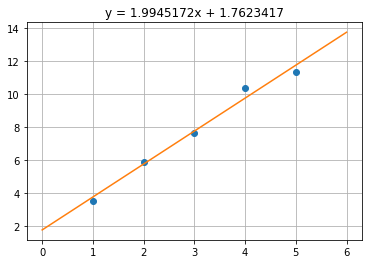

In [16]:
plt.figure(figsize=(6,4)) # figsize를 바꾸어보세요
plt.plot(x_train, y_train,'o') #train data 그리기

# 직선 그래프를 그리기 위한 코드
# 그래프의 x좌표를 일정 간격으로 설정함
x1 = np.linspace(np.min(x_train)-1, np.max(x_train)+1)
y1 = w1*x1 + b1
plt.plot(x1, y1)

plt.grid() # 격자
#plt.axis((np.min(x_train) - 1, np.max(x_train) + 1, np.min(y_train) - 1, np.max(y_train) + 1))
plt.title(str1)